In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from pathlib import Path

project_dir = Path("notebook.ipynb").resolve().parents[0]

In [122]:
os.listdir(f'{project_dir}/data')

['energia_total_consumidores_2010_2018.csv',
 'pib_total_2010_2018.csv',
 'energia_total_2010_2018.csv',
 'taxa_aprovacao_ensino_medio_2010_2018.csv',
 'taxa_reprovacao_ensino_fundamental_2010_2018.csv',
 'populacao_total_2010.csv',
 'taxa_analfabetismo_maiores_quinze_anos_2010.csv',
 'taxa_reprovacao_ensino_medio_2010_2018.csv',
 'total_concluintes_ensino_fundamental_2010_2014.csv',
 'total_acesso_internet_2010_2018.csv',
 'arrecadacao_tributos_federais_2010_2015.csv',
 'taxa_abandono_ensino_medio_2010_2018.csv',
 'total_concluintes_ensino_medio_2010_2014.csv',
 'estimativa_total_populacao_2010_2018.csv',
 'pib_per_capita_2010_2018.csv',
 'TarifaMediaFornecimento.csv',
 'total_concluintes_ensino_superior_2010_2018.csv',
 'taxa_abandono_ensino_fundamental_2010_2018.csv',
 'arrecadao_estadual_total_2010_2018.csv',
 'taxa_aprovacao_ensino_fundamental_2010_2018.csv']

In [136]:
total=0
initial_data = pd.read_csv('data/pib_per_capita_2010_2018.csv', sep=';',decimal=',', skiprows=5, encoding='latin-1')
initial_data = initial_data.drop(columns=['latitude','longitude'])

for column in initial_data.columns[2:]:
    column_name = re.sub(r'\D*','',column)
    initial_data = initial_data.rename(columns={column:f'{column_name}'})

var_name = re.findall(r'^[A-Za-z_]*','pib_per_capita_2010_2018.csv')[0][:-1]
melted_data = initial_data.melt(id_vars=['Município','ibge'], var_name=f'ano_{var_name}', value_name=f'{var_name}_value')
print(f'Tamanho inicial: {melted_data.shape}')
for file in os.listdir(f'{project_dir}/data/'):
    if file == ('pib_per_capita_2010_2018.csv'):
        continue
    elif file == 'TarifaMediaFornecimento.csv':
        continue
    else:
        data= pd.read_csv(f'{project_dir}/data/{file}',sep=';',decimal=',', skiprows=5, encoding='latin-1')
        #if data.columns.isin(c)olumns_to_delete=
        data= data.drop(columns=['latitude','longitude'])
        var_name = re.findall(r'^[A-Za-z_]*',file)[0][:-1]
        for column in data.columns[2:]:
            column_name = re.sub(r'\D*','',column)
            data = data.rename(columns={column:f'{column_name}'})
        #print(data.shape)
        data_melted = data.melt(id_vars=['Município','ibge'], var_name=f'ano_{var_name}', value_name=f'{var_name}_value')
        data_melted = data_melted.reset_index()
        #print(f'Dado melted:{data_melted.columns}')
        melted_data = melted_data.merge(data_melted, how='outer')
    total+= 1
    #print(total)
print(total)
print(f'Tamanho total: {melted_data.shape}')

Tamanho inicial: (4473, 4)
18
Tamanho total: (47083, 41)


In [74]:
teste = '2018'
teste = re.sub(r'\d','',teste)
teste[:-6]

'taxa_aprovacao_ensino_fundamental'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff5586c8d0>,
      dtype=object)

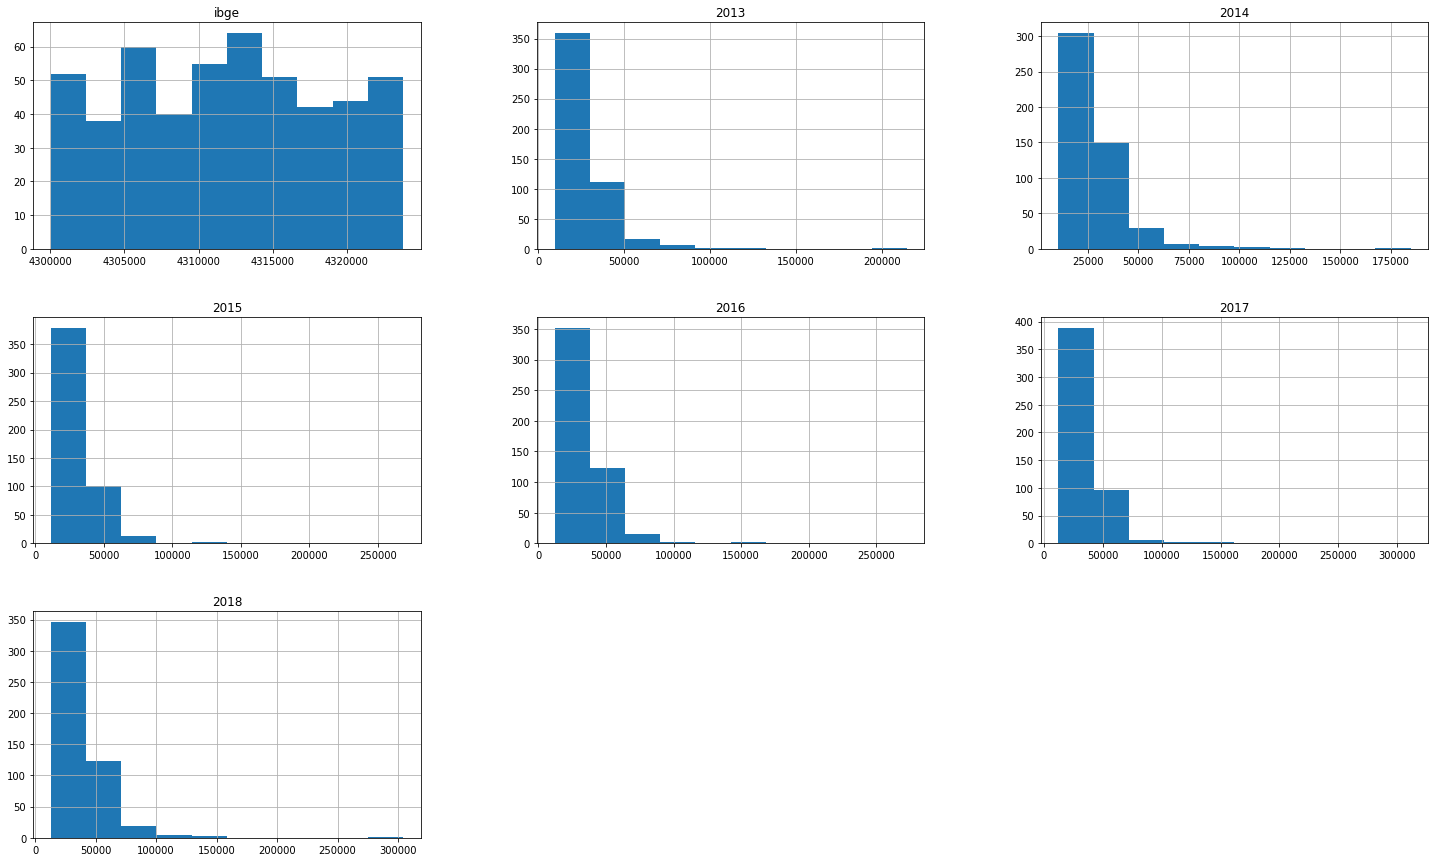

In [32]:
initial_data.hist(figsize=(25,15))

In [110]:
melted_data[melted_data.Município.isin(['Pelotas','Porto Alegre','Alegrete'])]

,Município,ibge,ano_pib_per_capita,pib_per_capita_value
5,Alegrete,4300406,2010,"13703,92"
310,Pelotas,4314407,2010,"12898,79"
325,Porto Alegre,4314902,2010,"30302,72"
502,Alegrete,4300406,2011,"14313,44"
807,Pelotas,4314407,2011,"16014,25"
822,Porto Alegre,4314902,2011,"34171,95"
999,Alegrete,4300406,2012,"16913,72"
1304,Pelotas,4314407,2012,"17412,93"
1319,Porto Alegre,4314902,2012,"38260,96"
1496,Alegrete,4300406,2013,19176.1


In [102]:
initial_data_melted[initial_data_melted.Município=='Pelotas']

,Município,ibge,ANO_PIB,PIB
310,Pelotas,4314407,2010,"12898,79"
807,Pelotas,4314407,2011,"16014,25"
1304,Pelotas,4314407,2012,"17412,93"
1801,Pelotas,4314407,2013,17489.3
2298,Pelotas,4314407,2014,19465.3
2795,Pelotas,4314407,2015,21558
3292,Pelotas,4314407,2016,23579.8
3789,Pelotas,4314407,2017,24894.7
4286,Pelotas,4314407,2018,25884.3
